In [1]:
import h2o
import math
import pandas as pd
import numpy as np
from h2o.estimators import H2OAutoEncoderEstimator
from h2o.estimators import H2ODeepLearningEstimator

In [2]:
# Initialize server
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-macosx) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-macosx) (build 25.121-b15, mixed mode)
  Starting server from /opt/miniconda2/envs/py36h2o/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/32/40942p_n2jx6zw74vvpshddc0000gq/T/tmp06bcbso3
  JVM stdout: /var/folders/32/40942p_n2jx6zw74vvpshddc0000gq/T/tmp06bcbso3/h2o_etto_started_from_python.out
  JVM stderr: /var/folders/32/40942p_n2jx6zw74vvpshddc0000gq/T/tmp06bcbso3/h2o_etto_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Amsterdam
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.8
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_etto_ra8gs0
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [4]:
# Configuration parameters
_vr_auto_encoder = 0.1  # Validation ratio for AutoEncoder
_vr_model = 0.1  # Validation ratio for DeepLearning model
_nmodels = 10  # Number of models going to train
_smodels = 5   # Number of models select to predict
_lim = 1       # Number of outliers removed from predictions, both maximums and minimums

In [5]:
# Load CSV data frames
p_data = pd.read_csv('Training.csv')
p_test = pd.read_csv('Testing.csv')

In [6]:
# Define columns
response_column = 'RUL'  # Define response column in the dataset

In [7]:
# Split p_data into validate and train
p_validate = p_data.sample(frac=_vr_auto_encoder, random_state=200) # Take sample data to validate AutoEncoder
p_train = p_data.drop(p_validate.index)

In [8]:
# Convert pandas frame to h2o
h_train = h2o.H2OFrame(p_train)
h_train.set_names(list(p_train.columns))
h_validate = h2o.H2OFrame(p_validate)
h_validate.set_names(list(p_validate.columns))
h_test = h2o.H2OFrame(p_test)
h_test.set_names(list(p_test.columns))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


UnitNumber,Time,Setting1,Setting2,Setting3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,RUL
1,31,-0.0006,0.0004,100,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,2388.08,9056.4,1.3,47.23,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100,38.81,23.3552,112
2,49,0.0018,-0.0001,100,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,2388.1,9044.77,1.3,47.67,521.74,2388.09,8126.9,8.4505,0.03,391,2388,100,38.81,23.2618,98
3,126,-0.0016,0.0004,100,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,2388.16,9049.26,1.3,47.88,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100,38.93,23.274,69
4,106,0.0012,0.0004,100,518.67,642.78,1594.53,1406.88,14.62,21.61,552.64,2388.13,9051.3,1.3,47.65,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100,38.58,23.2581,82
5,98,-0.0013,-0.0004,100,518.67,642.27,1589.94,1419.36,14.62,21.61,553.29,2388.1,9053.99,1.3,47.46,521,2388.15,8125.74,8.4362,0.03,394,2388,100,38.75,23.4117,91
6,105,0.0076,-0.0003,100,518.67,643.05,1586.94,1404.49,14.62,21.61,553.73,2388.14,9055.83,1.3,47.51,521.56,2388.15,8139.02,8.4452,0.03,393,2388,100,38.91,23.3269,93
7,160,0.0016,-0.0001,100,518.67,642.1,1589.59,1413.57,14.62,21.61,553.42,2388.04,9070.99,1.3,47.32,522.32,2388.07,8149.19,8.4028,0.03,393,2388,100,38.91,23.2763,91
8,166,0.0016,-0.0005,100,518.67,642.59,1591.91,1413.89,14.62,21.61,553.51,2388.14,9049.96,1.3,47.59,520.53,2388.12,8127.84,8.4744,0.03,393,2388,100,38.73,23.2465,95
9,55,-0.0003,0.0004,100,518.67,642.27,1593.61,1410.27,14.62,21.61,552.58,2388.13,9057.57,1.3,47.58,521.65,2388.16,8134.76,8.4293,0.03,392,2388,100,38.78,23.3515,111
10,192,-0.0018,0.0004,100,518.67,643,1589.5,1398.99,14.62,21.61,552.88,2388.11,9060.88,1.3,47.59,521.82,2388.08,8141.91,8.4194,0.03,393,2388,100,38.79,23.2956,96


In [9]:
# Select columns for AutoEncoder
ac_train_columns = list(p_data.columns) # Define autoencoder train columns
rm_columns = ['RUL', 'UnitNumber', 'Time', 'Setting1', 'Setting2', 'Setting3'] # Columns need to be removed
'''
Because we are using auto encoders to remove noises in sensor readings. So we have to select only sensor readings
'''
for column in rm_columns:
    ac_train_columns.remove(column)

In [10]:
# Define AutoEncoder model
auto_encoder_model = H2OAutoEncoderEstimator(
        activation="Tanh",
        hidden=[18],
        epochs=150,
        loss='Quadratic',
        distribution='gaussian'
    )

# Train AutoEncoder model
auto_encoder_model.train(x=ac_train_columns, training_frame=h_train, validation_frame=h_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [11]:
# Get reconstruction error
reconstruction_error = auto_encoder_model.anomaly(test_data=h_train, per_feature=False)
error_str = reconstruction_error.get_frame_data()
err_list = list(map(float, error_str.split("\n")[1:-1]))

In [12]:
# Filter anomalies in reconstruction error
'''
IQR Rule
----------------
Q25 = 25 th percentile
Q75 = 75 th percentile
IQR = Q75 - Q25 Inner quartile range
if abs(x-Q75) > 1.5 * IQR : A mild outlier
if abs(x-Q75) > 3.0 * IQR : An extreme outlier

'''
q25 = np.percentile(err_list, 25)
q75 = np.percentile(err_list, 75)
iqr = q75 - q25

rm_index = [] # Stores row numbers which have anomalies
for i in range(h_train.nrow):
    if abs(err_list[i] - q75) > 4 * iqr:
        rm_index.append(i)

# Remove anomalies
p_filtered = p_train.drop(p_train.index[rm_index])

In [13]:
# Convert pandas to H2OFrame
h_data = h2o.H2OFrame(p_filtered)
h_data.set_names(list(p_data.columns))

# DeepLearning model training and validation
h_train, h_validate = h_data.split_frame(ratios=[_vr_model])

# Extract ground truth data
ground_truth_data = np.array(p_test[response_column])

# Define columns
dl_train_columns = list(p_filtered.columns)
rm_columns = ['RUL', 'UnitNumber', 'Time']
for column in rm_columns:
    dl_train_columns.remove(column)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
# Building multiple models
print("Building Models")
print("---------------")
model_array = {}
for i in range(_nmodels):
    model_array[i] = H2ODeepLearningEstimator(nfolds=10)

Building Models
---------------


In [15]:
# Training models
print("Training Models")
print("---------------")
for i in range(_nmodels):
    model_array[i].train(x=dl_train_columns, y=response_column, training_frame=h_train)


Training Models
---------------
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [16]:
from sklearn_pandas import DataFrameMapper

def pandasToH2O(panda_frame):
    h2o.init()
    parsed_frame = h2o.H2OFrame(panda_frame)
    parsed_frame.set_names(list(panda_frame.columns))
    return parsed_frame

def pandasToSkLearn(panda_frame, training_features, response_feature):
    df_mapper = DataFrameMapper([(training_features, None), (response_feature, None)])
    parsed_frame = df_mapper.fit_transform(panda_frame)
    return parsed_frame

def h2oToNumpyArray(h2o_frame):
    h2o_frame = h2o_frame.get_frame_data()
    return np.array(list(map(float, h2o_frame.split("\n")[1:-1])))

def h2oToList(h2o_frame):
    h2o_frame = h2o_frame.get_frame_data()
    return h2o_frame.split("\n")[1:-1]

def calculateError(actual, predict):
    actual = h2oToNumpyArray(actual)
    
    predict = h2oToNumpyArray(predict)
    error = 0
    for i in range(len(actual)):
        d = predict[i] - actual[i]
        if d > 0:
            error += math.exp(d/10.0)
        elif d < 0:
            error += math.exp(d/13.0)
    return error

In [17]:
# Validate models and assign weights
print("Validating Models")
print("-----------------")
rmse_vals = np.zeros(shape=_nmodels) # Store root mean squared error of each model
for i in range(_nmodels):
    # performance = model_array[i].model_performance(test_data=h_validate)
    # rmse_vals[i] = math.sqrt(performance.mse())
    predict = model_array[i].predict(test_data=h_validate)
    actual = h_test['RUL']
    rmse_vals[i] = calculateError(actual, predict)

Validating Models
-----------------
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%


In [18]:
# Calculate weights
weights_array = 100 * np.amin(rmse_vals) / rmse_vals         # Lowest RMSE has highest weight and vice versa

In [19]:
# Select models
selected_models = weights_array.argsort()[-_smodels:][::-1]  # Filter indexes of (_smodels) number of models which have highest weights
model_array = [model_array[i] for i in selected_models]      # Selected model array
weights_array = [weights_array[i] for i in selected_models]  # Weights related to selected models
_nmodels = _smodels

In [20]:
# Predicting
print("Predicting")
print("----------")
prediction_array = {} # Store predictions related to each model. 2D array
for i in range(_nmodels):
    prediction_array[i] = model_array[i].predict(h_test)

Predicting
----------
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%


In [21]:
# Filter predictions
print("Filtering Predictions")
print("---------------------")
final_prediction = np.zeros(shape=h_test.nrow)
for i in range(h_test.nrow):
    per_model_result = []
    for j in range(_nmodels):
        per_model_result.append({'value': (prediction_array[j][i, 0] * weights_array[j]), 'weight': weights_array[j]})

    # Remove outliers
    sorted_filtered_results = sorted(per_model_result, key=lambda k: k['value'])[_lim:-_lim]

    # Weighted average
    result = sum(d['value'] for d in sorted_filtered_results) / float(sum(d['weight'] for d in sorted_filtered_results))

    final_prediction[i] = result

Filtering Predictions
---------------------


In [22]:
# Summary
print("Result")
print("------")
print("Root Mean Squared Error :", math.sqrt(mean_squared_error(ground_truth_data, final_prediction)))
print("Mean Absolute Error     :", mean_absolute_error(ground_truth_data, final_prediction))

Result
------
Root Mean Squared Error : 27.375865388498433
Mean Absolute Error     : 20.228538336660577


In [23]:
from presenting import Chart

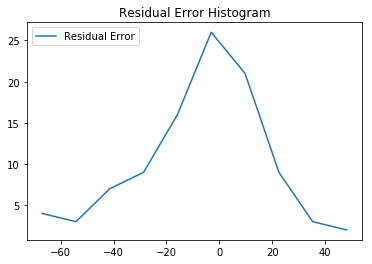

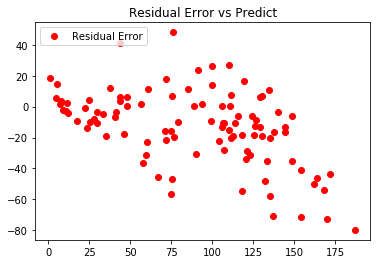

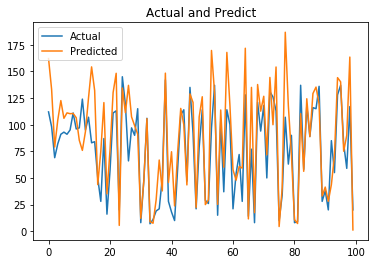

In [24]:
Chart.residual_histogram(ground_truth_data, final_prediction)
Chart.residual_vs_estimated(ground_truth_data, final_prediction)
Chart.acutal_and_predict(ground_truth_data, final_prediction)